In [1]:
import zipfile
import os

# נתיב לקובץ ה-ZIP שהועלה
zip_path = "/content/policestationboundaries.gdb.zip"

# חלץ את התוכן לתוך קולאב
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/PoliceStationBoundaries")

# ודא שהתיקייה קיימת
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
print("GeoDatabase path exists:", os.path.exists(gdb_path))


GeoDatabase path exists: True


In [2]:
!pip install fiona

In [3]:

def categorize_statistic_group(stat_group):
    categories = {
        "עבירות פליליות כלליות": ['עבירות כלפי הרכוש', 'עבירות נגד גוף', 'עבירות מין'],
        "עבירות מוסר": ['עבירות מוסר', 'עבירות סדר ציבורי'],
        "עבירות ביטחון": ['עבירות בטחון'],
        "עבירות כלכליות": ['עבירות כלכליות', 'עבירות מנהליות', 'עבירות רשוי'],
        "עבירות תנועה": ['עבירות תנועה'],
        "עבירות מרמה": ['עבירות מרמה'],
    }
    for category, types in categories.items():
        if stat_group in types:
            return category
    return None # Default for uncategorized types

In [4]:
import fiona

# רשימת שכבות
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
layers = fiona.listlayers(gdb_path)
print("Available layers:", layers)

# טען שכבה לדוגמה
import geopandas as gpd
layer_name = layers[0]  # שכבה ראשונה
gdf = gpd.read_file(gdb_path, layer=layer_name)

print(gdf.head())


Available layers: ['PoliceMahozBoundaries', 'PoliceMerhavBoundaries', 'PoliceStationBoundaries']
  MahozName   SHAPE_Length    SHAPE_Area  \
0      דרום  750722.926821  1.453584e+10   
1       חוף  374342.153371  1.254465e+09   
2   ירושלים  241526.065492  6.819003e+08   
3      מרכז  286816.457612  1.259039e+09   
4      צפון  461646.983931  4.257680e+09   

                                            geometry  
0  MULTIPOLYGON (((170684.18 641711.35, 170760.07...  
1  MULTIPOLYGON (((228445.15 778605.01, 228464.34...  
2  MULTIPOLYGON (((216169.05 623628.83, 216118.25...  
3  MULTIPOLYGON (((188790.45 702021.73, 188890.1 ...  
4  MULTIPOLYGON (((273645.94 803870.81, 275379.97...  


    MerhavName MahozName   SHAPE_Length    SHAPE_Area  \
0  מרחב איילון   תל אביב   38864.683903  5.276257e+07   
1    מרחב אילת      דרום  280405.324417  2.702414e+09   
2     מרחב אשר       חוף  208311.404629  5.074636e+08   
3    מרחב גליל      צפון  145792.205732  4.325043e+08   
4     מרחב דוד   ירושלים    4975.103767  1.097502e+06   

                                            geometry  
0  MULTIPOLYGON (((181127.17 665160.55, 181142.64...  
1  MULTIPOLYGON (((170494.88 477632.37, 170502.85...  
2  MULTIPOLYGON (((228445.15 778605.01, 228464.34...  
3  MULTIPOLYGON (((234937.86 765555.03, 234948.66...  
4  MULTIPOLYGON (((222538.55 632343.1, 222545.84 ...  


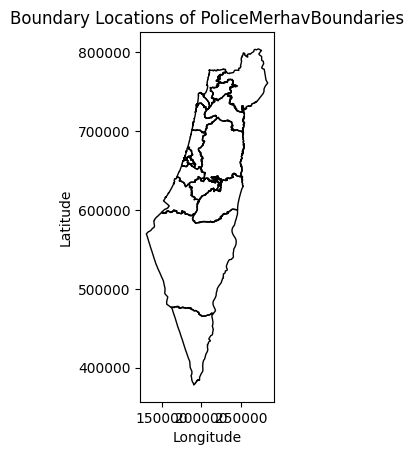

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"

# שם השכבה שאתה רוצה לטעון
layer_name = "PoliceMerhavBoundaries"  # שם השכבה של המרחבים

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# הצגת 5 השורות הראשונות כדי לראות את הנתונים
print(gdf.head())

# הצגת המפה עם הגבולות הגיאוגרפיים של המרחבים
gdf.plot(edgecolor='black', facecolor='none')
plt.title(f"Boundary Locations of {layer_name}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# **ייבוא הדאטה**

In [6]:
import requests
import pandas as pd


In [7]:
url_2020 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=520597e3-6003-4247-9634-0ae85434b971'
response_2020 = requests.get(url_2020)
data_2020 = response_2020.json()
records_2020 = data_2020['result']['records']
df_2020 = pd.DataFrame(records_2020)

In [8]:
url_2021 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=3f71fd16-25b8-4cfe-8661-e6199db3eb12'
response_2021 = requests.get(url_2021)
data_2021 = response_2021.json()
records_2021 = data_2021['result']['records']
df_2021 = pd.DataFrame(records_2021)

In [9]:
url_2022 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=a59f3e9e-a7fe-4375-97d0-76cea68382c1'
response_2022 = requests.get(url_2022)
data_2022 = response_2022.json()
records_2022 = data_2022['result']['records']
df_2022 = pd.DataFrame(records_2022)

In [10]:
url_2023 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=32aacfc9-3524-4fba-a282-3af052380244'
response_2023 = requests.get(url_2023)
data_2023 = response_2023.json()
records_2023 = data_2023['result']['records']
df_2023 = pd.DataFrame(records_2023)

In [11]:
url_2024 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=5fc13c50-b6f3-4712-b831-a75e0f91a17e'
response_2024 = requests.get(url_2024)
data_2024 = response_2024.json()
records_2024 = data_2024['result']['records']
df_2024 = pd.DataFrame(records_2024)

In [12]:
df_all = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df_all["StatisticGroup"] = df_all["StatisticGroup"].apply(categorize_statistic_group)
df_all = df_all[df_all["StatisticGroup"].notna()]
###########

In [13]:
# הדפסת שמות הקטגוריות הייחודיות
unique_categories = df_all["StatisticGroup"].unique()
print("קטגוריות ייחודיות:")
print(unique_categories)


קטגוריות ייחודיות:
['עבירות פליליות כלליות' 'עבירות מוסר' 'עבירות ביטחון' 'עבירות מרמה'
 'עבירות תנועה' 'עבירות כלכליות']


## **תיאום שמות מרחבים**

In [14]:
import pandas as pd
import geopandas as gpd

merhav_mapping = {

    "מרחב איילון החדש תא": "מרחב איילון",
    "מרחב איילון הישן תא": "מרחב איילון",
    "מרחב לכיש": "מרחב לכיש",
    "מרחב נגב": "מרחב נגב",
    "מרחב שרון": "מרחב שרון",
    "מרחב אילת דרום": "מרחב אילת",
    "מרחב אשר חוף": "מרחב אשר",
    "מרחב יהודה שי": "מרחב יהודה",
    "מרחב גליל צפון": "מרחב גליל",
    "מרחב ירקון תא":"מרחב ירקון",
    "מרחב דוד ירושלים": "מרחב דוד",
    "מרחב שומרון שי": "מרחב שומרון",
    "מרחב כרמל חוף": "מרחב כרמל",
    'מרחב שפלה': 'מרחב שפלה\r\n',  # תיקון תו מיוחד
    "מרחב דן תא": "מרחב דן",
    "מרחב קדם ירושלים": "מרחב קדם",
    "מרחב ציון ירושלים": "מרחב ציון",
    "מרחב כנרת צפון": "מרחב כנרת",
    "מרחב עמקים צפון": "מרחב עמקים",
    'מרחב נתבג מרכז': "מרחב נתב\"ג",
    "מרחב מנשה חוף": "מרחב מנשה",
}


# שלב 1: הסרת ערכים ריקים ו-None לפני המיפוי
df_all = df_all.dropna(subset=['PoliceMerhav'])  # הסרת ערכים ריקים
df_all = df_all[df_all['PoliceMerhav'] != '']  # הסרת ערכים ריקים (מחרוזות ריקות)

# שלב 2: מיפוי השמות הישנים לשמות החדשים
df_all['PoliceMerhav'] = df_all['PoliceMerhav'].replace(merhav_mapping)

# שלב 3: הסרת כל ערך שאינו תואם למפות (אם יש שמות שלא נמצאים במיפוי)
df_all = df_all[df_all['PoliceMerhav'].isin(merhav_mapping.values())]

# שלב 4: ווידוא שהשמות תואמים
unique_values_df = df_all['PoliceMerhav'].unique()
unique_values_map = gdf['MerhavName'].unique()

# חיתוך של הערכים
set_unique_df = set(unique_values_df)
set_unique_map = set(unique_values_map)

# ערכים משותפים
common_values = set_unique_df.intersection(set_unique_map)
print("\nערכים זהים בין df ל-map:")
print(common_values)

# ערכים שיש ב-df ואין ב-map
values_in_df_not_in_map = set_unique_df.difference(set_unique_map)
print("\nערכים שנמצאים ב-df אך לא ב-map:")
print(values_in_df_not_in_map)

# ערכים שיש ב-map ואין ב-df
values_in_map_not_in_df = set_unique_map.difference(set_unique_df)
print("\nערכים שנמצאים ב-map אך לא ב-df:")
print(values_in_map_not_in_df)

# שלב 5: בדיקה אם הכל תואם
if not values_in_df_not_in_map and not values_in_map_not_in_df:
    print("\nהכל תקין! כל הערכים תואמים בין df ל-map.")
else:
    print("\nיש אי התאמות בין הערכים של df ל-map.")

# שלב 6: ייצוא הקובץ CSV
df_all.to_csv('/content/clean_df.csv', index=False)


ערכים זהים בין df ל-map:
{'מרחב נגב', 'מרחב דוד', 'מרחב ציון', 'מרחב שומרון', 'מרחב אשר', 'מרחב נתב"ג', 'מרחב שרון', 'מרחב קדם', 'מרחב שפלה\r\n', 'מרחב עמקים', 'מרחב מנשה', 'מרחב לכיש', 'מרחב כנרת', 'מרחב דן', 'מרחב גליל', 'מרחב אילת', 'מרחב ירקון', 'מרחב יהודה', 'מרחב כרמל', 'מרחב איילון'}

ערכים שנמצאים ב-df אך לא ב-map:
set()

ערכים שנמצאים ב-map אך לא ב-df:
set()

הכל תקין! כל הערכים תואמים בין df ל-map.


In [15]:
!pip install dash

In [16]:
!pip install dash_bootstrap_components

In [17]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import geopandas as gpd
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# יצירת אפליקציית Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
layer_name = "PoliceMerhavBoundaries"

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# טוען את הדאטה פריים שלך (זה הדאטה שמכיל את כל העבירות והמידע)
# כאן אתה צריך להחליף את הנתיב של df_all עם הקובץ שלך שמכיל את העבירות
# df_all = pd.read_csv('data.csv')  # יש למלא את הנתיב המתאים

# התחלת האפליקציה עם ממשק לבחירת סוג העבירה ושנת העבירה
app.layout = html.Div([
    dbc.Row([
        dbc.Col(html.H1("מפת חום - עבירות משטרת ישראל"), width=12)
    ]),
    dbc.Row([
        dbc.Col(html.Label("בחר סוג עבירה:"), width=4),
        dbc.Col(dcc.Dropdown(
            id='crime-type-dropdown',
            options=[{'label': crime, 'value': crime} for crime in df_all['StatisticGroup'].unique()] + [{'label': 'כל סוגי העבירות', 'value': 'all_crimes'}],
            value='all_crimes',  # ברירת מחדל
            clearable=False
        ), width=4),
    ]),

    dbc.Row([
        dbc.Col(html.Label("בחר שנה:"), width=4),
        dbc.Col(dcc.Dropdown(
            id='year-dropdown',
            options=[
                {'label': 'לאורך כל השנים', 'value': 'all_years'},
                {'label': '2020', 'value': 2020},
                {'label': '2021', 'value': 2021},
                {'label': '2022', 'value': 2022},
                {'label': '2023', 'value': 2023},
                {'label': '2024', 'value': 2024}
            ],
            value='all_years',  # ברירת מחדל
            clearable=False
        ), width=4),
    ]),

    dbc.Row([
        dbc.Col(html.Img(id='heatmap', style={'width': '100%'}), width=12)
    ])
])

# פונקציה ליצירת המפה ב- Matplotlib ולהמיר לתמונה
@app.callback(
    Output('heatmap', 'src'),
    [Input('crime-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def generate_static_map(selected_crime, selected_year):
    # אם נבחר "כל סוגי העבירות", נתייחס לכל העבירות
    if selected_crime == 'all_crimes':
        filtered_df = df_all
    else:
        filtered_df = df_all[df_all['StatisticGroup'] == selected_crime]

    # סינון לפי שנה
    if selected_year != 'all_years':
        filtered_df = filtered_df[filtered_df['Year'] == selected_year]

    # סיכום כמות הרשומות לכל מרחב
    merhav_counts = filtered_df['PoliceMerhav'].value_counts()

    # הוספת עמודת 'record_count' ל-gdf עם כמות הרשומות
    gdf['record_count'] = gdf['MerhavName'].map(merhav_counts).fillna(0)

    # יצירת המפה הסטטית ב-Matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf.plot(column='record_count', ax=ax, legend=True,
             legend_kwds={'label': "Number of Records by Police Merhav",
                          'orientation': "horizontal"},
             cmap='YlOrRd', edgecolor='black')
    ax.set_title(f"Heatmap of {selected_crime} for {selected_year}" if selected_year != 'all_years' else f"Heatmap of {selected_crime} (All Years)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # המרת התמונה ל-base64
    buf = BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()

    # החזרת התמונה כ-URL לשימוש ב-Dash
    return f"data:image/png;base64,{img_str}"

if __name__ == '__main__':
    app.run_server(debug=True)




<ipython-input-17-b87da6aee164>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-17-b87da6aee164>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

**ויזואלציה גרועה**

In [19]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import geopandas as gpd
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# יצירת אפליקציית Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
layer_name = "PoliceMerhavBoundaries"

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# טוען את הדאטה פריים שלך (זה הדאטה שמכיל את כל העבירות והמידע)
# כאן אתה צריך להחליף את הנתיב של df_all עם הקובץ שלך שמכיל את העבירות
# df_all = pd.read_csv('data.csv')  # יש למלא את הנתיב המתאים

# מיון הרשומות לפי סדר אלפביתי עברי
sorted_crimes = sorted(df_all['StatisticGroup'].unique(), key=lambda x: x)

# הוספת "כל סוגי העבירות" כראשון ברשימה
sorted_crimes = ['all_crimes'] + sorted_crimes

# התחלת האפליקציה עם ממשק לבחירת סוג העבירה ושנת העבירה
app.layout = html.Div([
    dbc.Row([
        dbc.Col(html.H1("מפת חום - עבירות משטרת ישראל"), width=12)
    ]),
    dbc.Row([
        dbc.Col(html.Label("בחר סוג עבירה:"), width=4),
        dbc.Col(dcc.Dropdown(
            id='crime-type-dropdown',
            options=[{'label': 'כל סוגי העבירות', 'value': 'all_crimes'}] + [{'label': crime, 'value': crime} for crime in sorted_crimes[1:]],
            value='all_crimes',  # ברירת מחדל
            clearable=False
        ), width=4),
    ]),

    dbc.Row([
        dbc.Col(html.Label("בחר שנה:"), width=4),
        dbc.Col(dcc.Dropdown(
            id='year-dropdown',
            options=[
                {'label': 'לאורך כל השנים', 'value': 'all_years'},
                {'label': '2020', 'value': 2020},
                {'label': '2021', 'value': 2021},
                {'label': '2022', 'value': 2022},
                {'label': '2023', 'value': 2023},
                {'label': '2024', 'value': 2024}
            ],
            value='all_years',  # ברירת מחדל
            clearable=False
        ), width=4),
    ]),

    dbc.Row([
        dbc.Col(html.Img(id='heatmap', style={'width': '100%'}), width=12)
    ])
])

# פונקציה ליצירת המפה ב- Matplotlib ולהמיר לתמונה
@app.callback(
    Output('heatmap', 'src'),
    [Input('crime-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def generate_static_map(selected_crime, selected_year):
    # אם נבחר "כל סוגי העבירות", נתייחס לכל העבירות
    if selected_crime == 'all_crimes':
        filtered_df = df_all
    else:
        filtered_df = df_all[df_all['StatisticGroup'] == selected_crime]

    # סינון לפי שנה
    if selected_year != 'all_years':
        filtered_df = filtered_df[filtered_df['Year'] == selected_year]

    # סיכום כמות הרשומות לכל מרחב
    merhav_counts = filtered_df['PoliceMerhav'].value_counts()

    # הוספת עמודת 'record_count' ל-gdf עם כמות הרשומות
    gdf['record_count'] = gdf['MerhavName'].map(merhav_counts).fillna(0)

    # יצירת המפה הסטטית ב-Matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf.plot(column='record_count', ax=ax, legend=True,
             legend_kwds={'label': "Number of Records by Police Merhav",
                          'orientation': "horizontal"},
             cmap='YlOrRd', edgecolor='black')
    ax.set_title(f"Heatmap of {selected_crime} for {selected_year}" if selected_year != 'all_years' else f"Heatmap of {selected_crime} (All Years)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # המרת התמונה ל-base64
    buf = BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()

    # החזרת התמונה כ-URL לשימוש ב-Dash
    return f"data:image/png;base64,{img_str}"

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>